# Analyzing Factors Influencing COVID-19 Severity and Vaccination Uptake In United States 

## Business Understanding

What socio-economic and demographic factors influence the severity of COVID-19 cases and the 
rates of vaccination uptake in the U.S.? 

Socio- economic and demographic factors include:  
• Race and Ethnicity 
• Age 
• Access to Health Insurance and Medical Care

## Data Extraction (Source)

This Data represents all vaccine partners including jurisdictional partner clinics, retail pharmacies, long-term care facilities, dialysis centers, Federal Emergency Management Agency and Health Resources and Services Administration partner sites, and federal entity facilities. 

CDC: Centers for Disease Control and Prevention - "https://data.cdc.gov/Vaccinations/COVID-19-Vaccination-Demographics-in-the-United-St/km4m-vcsb/about_data"

## Data Understanding 

Date: Date data are reported on CDC COVID Data Tracker - date

Demographic_category: Age, sex or race/ethnicity of person receiving vaccination - demographic_category

Administered_Dose1 : Total count of people with at least one dose in demographic category - administered_dose1

Administered_Dose1_pct_known: Percent among persons with at least one dose who are Hispanic/Latino - administered_dose1_pct_known

Administered_Dose1_pct_US : Percent among persons with at least one dose, who have demographic information available on age, race/ethnicity or sex - administered_dose1_pct_us

Series_Complete_Yes : Total count of people who completed a primary series - series_complete_yes

Administered_Dose1_pct_agegroup : Percent among persons with at least one dose in demographic category - administered_dose1_pct

Series_Complete_Pop_pct_agegroup : Percent of people in a demographic category who have completed a primary series and have information for the selected demographic category - series_complete_pop_pct

Series_Complete_Pop_Pct_known : Percent of people with a completed primary series who have known demographic information for the selected demographic category - series_complete_pop_pct_known

Series_Complete_Pop_Pct_US : Percent of people with a completed primary series who have known demographic information for the selected demographic category -series_complete_pop_pct_us

Booster_Doses_Vax_pct_agegroup : Percent of people aged 5 years and older with a completed primary series in a demographic category who have received a booster dose and have information for the selected demographic category - booster_doses_vax_pct_agegroup

Booster_Doses_Pop_Pct_known: Percent of people aged 5 years and older with a completed primary series who received a booster dose and have known demographic information for the selected demographic category - booster_doses_pop_pct_known

Booster_Doses_Vax_Pct_US : Percent of the fully vaccinated population aged 5 years and older with a completed primary series and a booster dose who have known demographic information for the selected demographic category - booster_doses_vax_pct_us

Booster_Doses_Pop_Pct_known_Last14Days : Percent of population aged 5 years and older with a completed primary series and a booster dose (within the last 14 days) who have known demographic information for the selected demographic category - booster_doses_pop_pct_known_last14days

Booster_Doses_Yes : People 12+ with a booster dose - booster_doses_yes

Booster_Doses_Yes_Last14Days : People 12+ with a booster dose in the last 14 days - booster_doses_yes_last14days

Second_Booster_Vax_pct_agegroup : Percent of people aged 50 years and older in a demographic category with a first booster dose who have received a second booster dose and have information for the selected demographic category - second_booster_vax_pct_agegroup

Second_Booster_Pop_Pct_known : Percent of people aged 50 years and older with a first booster who have received a second booster dose and have known demographic information for the selected demographic category - second_booster_pop_pct_known

Second_Booster_Pop_Pct_US : Percent of population aged 50 years and older with a completed primary series and a first booster dose who have known demographic information for the selected demographic category - second_booster_pop_pct_us

Second_Booster_Pop_Pct_known_Last14Days : Percent of people aged 50 years and older with a first booster who have received a second booster dose (within the last 14 days) and have known demographic information for the selected demographic category - second_booster_pop_pct_known_last14days

Second_Booster : Total count of people aged 50 years and older with a second booster dose - second_booster
Second_Booster_Last14Days : Total count of people aged 50 years and older with a second booster dose in the last 14 days - second_booster_last14days

Bivalent_Booster : Total count of people aged 5 years and older with a bivalent booster dose - bivalent_booster

Bivalent_Booster_Pop_Pct_agegroup : Percent of people in a demographic category who have a bivalent booster dose who have information for the selected demographic category - bivalent_booster_pop_pct_agegroup

Bivalent_Booster_Pop_Pct_known : Percent of people with a bivalent booster dose who have known demographic information for the selected demographic category - bivalent_booster_pop_pct_known


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



## Reading The Dataset

In [2]:
data=pd.read_csv(r"C:\Users\mura2\Downloads\COVID-19_Vaccination_Demographics_in_the_United_States_National_20241118.csv")

## Overview

In [3]:
print("The dataframe have the following shape:")
print("Rows:", len(data), "and Columns:", len(data.columns))
print()
# Displaying the first few rows of the dataset
data.head(60)

The dataframe have the following shape:
Rows: 29886 and Columns: 25



,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,...,Booster_Doses_Yes_Last14Days,Second_Booster_Vax_pct_agegroup,Second_Booster_Pop_Pct_known,Second_Booster_Pop_Pct_US,Second_Booster_Pop_Pct_known_Last14Days,Second_Booster,Second_Booster_Last14Days,Bivalent_Booster,Bivalent_Booster_Pop_Pct_agegroup,Bivalent_Booster_Pop_Pct_known
0,05/10/2023,Race_eth_NHAIAN,1911855,0.9,0.7,1588653,78.5,65.2,0.9,0.7,...,914,50.1,0.6,0.5,0.9,202047.0,592.0,378599.0,15.5,0.7
1,05/10/2023,Age_unknown,9344,0.0,0.0,2491,NaN,NaN,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,05/10/2023,Race_eth_NHAsian,13983704,6.8,5.2,12609000,73.6,66.4,6.9,5.5,...,6400,56.2,6.1,5.5,7.1,2027791.0,4897.0,4200667.0,22.1,8.3
3,05/10/2023,Race_eth_NHMult_Oth,12665103,6.2,4.7,11389487,NaN,NaN,6.2,4.9,...,4837,54.9,6.1,5.6,6.0,2053261.0,4104.0,3203837.0,NaN,6.3
4,05/10/2023,Race_eth_NHBlack,21157654,10.3,7.8,18545870,51.3,45.0,10.1,8.0,...,7656,47.9,8.2,7.4,10.8,2727568.0,7417.0,3900005.0,9.5,7.7
5,05/10/2023,Sex_Male,128162118,47.9,47.4,109144882,78.4,66.8,47.6,47.3,...,35823,52.2,44.7,44.7,47.4,16426586.0,35849.0,25530530.0,15.6,45.3
6,05/10/2023,Race_eth_NHNHOPI,666432,0.3,0.2,598992,71.8,64.5,0.3,0.3,...,234,49.7,0.2,0.2,0.3,69896.0,181.0,117604.0,12.7,0.2
7,05/10/2023,Ages_25-39_yrs,57069471,21.1,21.1,47567709,83.4,69.6,20.6,20.6,...,9317,NaN,NaN,NaN,NaN,NaN,NaN,7348112.0,10.7,13.0
8,05/10/2023,Ages_40-49_yrs,36300944,13.4,13.4,31261428,89.0,76.6,13.6,13.6,...,5562,NaN,NaN,NaN,NaN,NaN,NaN,5856011.0,14.4,10.4
9,05/10/2023,Ages_65-74_yrs,34959727,12.9,12.9,30816762,95.0,95.0,13.4,13.4,...,15109,58.9,35.6,35.6,41.7,13094837.0,31550.0,13352337.0,41.9,23.6


In [4]:
data.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
Administered_Dose1,29886.000000,47081800.093489,69589484.584930,0.000000,1996994.250000,14247187.000000,57302471.500000,270227181.000000
Administered_Dose1_pct_known,29007.000000,21.451312,29.300562,0.000000,1.800000,8.800000,27.100000,99.900000
Administered_Dose1_pct_US,29886.000000,21.981818,29.899893,0.000000,1.700000,7.800000,25.700000,100.000000
Series_Complete_Yes,29886.000000,40135676.902530,60460649.060327,0.000000,1413434.500000,12048851.500000,47098598.750000,230637348.000000
Administered_Dose1_pct_agegroup,22854.000000,52.402428,32.015266,0.000000,23.300000,61.700000,78.200000,95.000000
Series_Complete_Pop_pct_agegroup,22854.000000,45.390199,29.728406,0.000000,14.600000,55.100000,66.400000,95.000000
Series_Complete_Pop_Pct_known,29007.000000,21.282756,29.341456,0.000000,1.400000,8.400000,25.600000,99.900000
Series_Complete_Pop_Pct_US,29886.000000,22.073242,30.155867,0.000000,1.900000,8.000000,25.900000,100.000000
Booster_Doses_Vax_pct_agegroup,29886.000000,24.204858,25.088819,0.000000,0.000000,15.900000,47.800000,76.600000
Booster_Doses_Pop_Pct_known,29007.000000,15.054973,27.010827,0.000000,0.000000,1.700000,15.400000,99.900000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29886 entries, 0 to 29885
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     29886 non-null  object 
 1   Demographic_category                     29886 non-null  object 
 2   Administered_Dose1                       29886 non-null  int64  
 3   Administered_Dose1_pct_known             29007 non-null  float64
 4   Administered_Dose1_pct_US                29886 non-null  float64
 5   Series_Complete_Yes                      29886 non-null  int64  
 6   Administered_Dose1_pct_agegroup          22854 non-null  float64
 7   Series_Complete_Pop_pct_agegroup         22854 non-null  float64
 8   Series_Complete_Pop_Pct_known            29007 non-null  float64
 9   Series_Complete_Pop_Pct_US               29886 non-null  float64
 10  Booster_Doses_Vax_pct_agegroup           29886

In [6]:
data.nunique()

Date                                         879
Demographic_category                          34
Administered_Dose1                         27840
Administered_Dose1_pct_known                 648
Administered_Dose1_pct_US                    708
Series_Complete_Yes                        27369
Administered_Dose1_pct_agegroup              951
Series_Complete_Pop_pct_agegroup             951
Series_Complete_Pop_Pct_known                674
Series_Complete_Pop_Pct_US                   730
Booster_Doses_Vax_pct_agegroup               767
Booster_Doses_Pop_Pct_known                  585
Booster_Doses_Vax_Pct_US                     672
Booster_Doses_Pop_Pct_known_Last14Days       678
Booster_Doses_Yes                          17882
Booster_Doses_Yes_Last14Days               17129
Second_Booster_Vax_pct_agegroup              652
Second_Booster_Pop_Pct_known                 541
Second_Booster_Pop_Pct_US                    566
Second_Booster_Pop_Pct_known_Last14Days      760
Second_Booster      

In [7]:
#Check how many duplicate rows there are
dup_data = data[data.duplicated()]
print(dup_data.shape)


(0, 25)


In [8]:
#Drop duplicates
df = data.drop_duplicates(keep='last')
df.shape

(29886, 25)

In [9]:
# Check for missing values
print(data.isnull().sum())


Date                                           0
Demographic_category                           0
Administered_Dose1                             0
Administered_Dose1_pct_known                 879
Administered_Dose1_pct_US                      0
Series_Complete_Yes                            0
Administered_Dose1_pct_agegroup             7032
Series_Complete_Pop_pct_agegroup            7032
Series_Complete_Pop_Pct_known                879
Series_Complete_Pop_Pct_US                     0
Booster_Doses_Vax_pct_agegroup                 0
Booster_Doses_Pop_Pct_known                  879
Booster_Doses_Vax_Pct_US                       0
Booster_Doses_Pop_Pct_known_Last14Days       879
Booster_Doses_Yes                              0
Booster_Doses_Yes_Last14Days                   0
Second_Booster_Vax_pct_agegroup            10548
Second_Booster_Pop_Pct_known               11427
Second_Booster_Pop_Pct_US                  10548
Second_Booster_Pop_Pct_known_Last14Days    11427
Second_Booster      

## Performing EDA(Exploratory Data Analysis)

In [10]:
categories=data['Demographic_category'].unique()
print(categories)
len(categories)


['Race_eth_NHAIAN' 'Age_unknown' 'Race_eth_NHAsian' 'Race_eth_NHMult_Oth'
 'Race_eth_NHBlack' 'Sex_Male' 'Race_eth_NHNHOPI' 'Ages_25-39_yrs'
 'Ages_40-49_yrs' 'Ages_65-74_yrs' 'Race_eth_NHMultiracial' 'Ages_<12yrs'
 'Ages_12-17_yrs' 'Age_known' 'Ages_<2yrs' 'Sex_Female' 'Sex_unknown'
 'Ages_18-24_yrs' 'Race_eth_NHOther' 'Race_eth_unknown' 'Race_eth_known'
 'Sex_known' 'Ages_65+_yrs' 'Ages_25-49_yrs' 'US' 'Ages_75+_yrs'
 'Race_eth_Hispanic' 'Race_eth_NHWhite' 'Ages_5-11_yrs' 'Ages_2-4_yrs'
 'Ages_16-17_yrs' 'Ages_50-64_yrs' 'Ages_<5yrs' 'Ages_12-15_yrs']


34

In [13]:
# Columns contributing to vaccine intake
columns_to_sum = [
    'Administered_Dose1', 
    'Series_Complete_Yes', 
    'Booster_Doses_Yes', 
    'Second_Booster', 
    'Bivalent_Booster'
]

# Filter valid columns
columns_to_sum = [col for col in columns_to_sum if col in data.columns]

# Add Total_Intake column
data['Total_Intake'] = data[columns_to_sum].sum(axis=1)


In [14]:
data.columns

Index(['Date', 'Demographic_category', 'Administered_Dose1',
       'Administered_Dose1_pct_known', 'Administered_Dose1_pct_US',
       'Series_Complete_Yes', 'Administered_Dose1_pct_agegroup',
       'Series_Complete_Pop_pct_agegroup', 'Series_Complete_Pop_Pct_known',
       'Series_Complete_Pop_Pct_US', 'Booster_Doses_Vax_pct_agegroup',
       'Booster_Doses_Pop_Pct_known', 'Booster_Doses_Vax_Pct_US',
       'Booster_Doses_Pop_Pct_known_Last14Days', 'Booster_Doses_Yes',
       'Booster_Doses_Yes_Last14Days', 'Second_Booster_Vax_pct_agegroup',
       'Second_Booster_Pop_Pct_known', 'Second_Booster_Pop_Pct_US',
       'Second_Booster_Pop_Pct_known_Last14Days', 'Second_Booster',
       'Second_Booster_Last14Days', 'Bivalent_Booster',
       'Bivalent_Booster_Pop_Pct_agegroup', 'Bivalent_Booster_Pop_Pct_known',
       'Total_Intake'],
      dtype='object')

In [15]:
# Filtering rows where 'Demographic_category' contains values starting with 'Ages_'
age_data = data[data['Demographic_category'].str.startswith('Ages_')]

# Display the filtered data
print(age_data)


             Date Demographic_category  Administered_Dose1  \
7      05/10/2023       Ages_25-39_yrs            57069471   
8      05/10/2023       Ages_40-49_yrs            36300944   
9      05/10/2023       Ages_65-74_yrs            34959727   
11     05/10/2023          Ages_<12yrs            13705953   
12     05/10/2023       Ages_12-17_yrs            18272244   
...           ...                  ...                 ...   
29879  12/13/2020       Ages_16-17_yrs                 318   
29882  12/13/2020       Ages_18-24_yrs                1843   
29883  12/13/2020         Ages_65+_yrs               10752   
29884  12/13/2020       Ages_40-49_yrs                5517   
29885  12/13/2020       Ages_65-74_yrs                6591   

       Administered_Dose1_pct_known  Administered_Dose1_pct_US  \
7                              21.1                       21.1   
8                              13.4                       13.4   
9                              12.9                      

In [16]:
# Extracting relevant columns for analysis
df = data[['Date', 'Demographic_category', 'Total_Intake']].copy()

# Creating new columns for Age, Race, and Sex
df.loc[:, 'Age'] = df['Demographic_category'].where(df['Demographic_category'].str.startswith('Ages_'))
df.loc[:, 'Race'] = df['Demographic_category'].where(df['Demographic_category'].str.startswith('Race_eth_'))
df.loc[:, 'Sex'] = df['Demographic_category'].where(df['Demographic_category'].str.startswith('Sex_'))

# Drop rows where all categories (Age, Race, Sex) are NaN
df_cleaned = df.dropna(subset=['Age', 'Race', 'Sex'], how='all').reset_index(drop=True)

# Display a sample of the cleaned dataset
print(df_cleaned.head(20))


          Date    Demographic_category  Total_Intake             Age  \
0   05/10/2023         Race_eth_NHAIAN     4882869.0             NaN   
1   05/10/2023        Race_eth_NHAsian    41648559.0             NaN   
2   05/10/2023     Race_eth_NHMult_Oth    36011095.0             NaN   
3   05/10/2023        Race_eth_NHBlack    55497563.0             NaN   
4   05/10/2023                Sex_Male   332977938.0             NaN   
5   05/10/2023        Race_eth_NHNHOPI     1764259.0             NaN   
6   05/10/2023          Ages_25-39_yrs   131079293.0  Ages_25-39_yrs   
7   05/10/2023          Ages_40-49_yrs    88467664.0  Ages_40-49_yrs   
8   05/10/2023          Ages_65-74_yrs   114451583.0  Ages_65-74_yrs   
9   05/10/2023  Race_eth_NHMultiracial    15415550.0             NaN   
10  05/10/2023             Ages_<12yrs    28265948.0     Ages_<12yrs   
11  05/10/2023          Ages_12-17_yrs    41046474.0  Ages_12-17_yrs   
12  05/10/2023              Ages_<2yrs     1144655.0      Ages_<

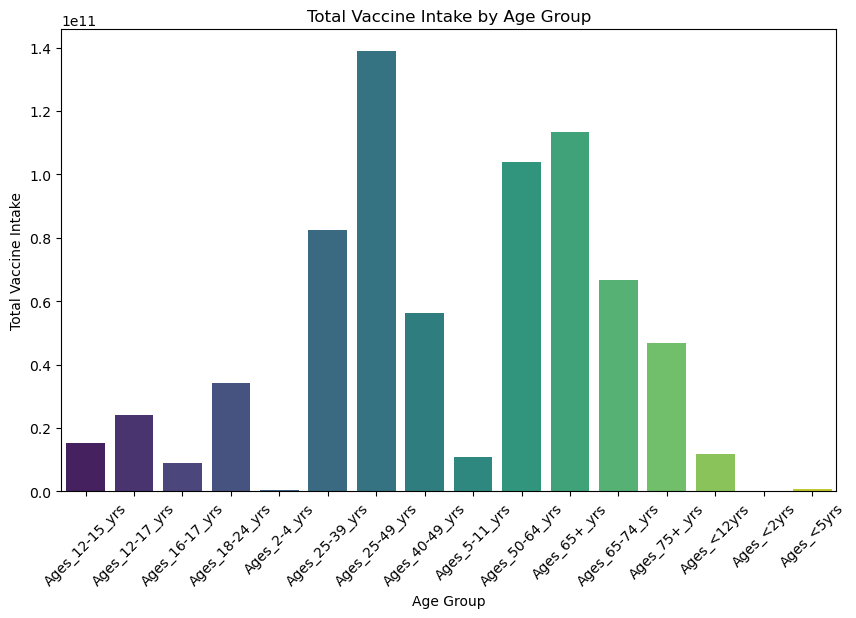

In [17]:
# Group by Age and calculate total intake
age_data = df_cleaned.groupby('Age')['Total_Intake'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=age_data, x='Age', y='Total_Intake', palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Vaccine Intake by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Vaccine Intake')
plt.show()

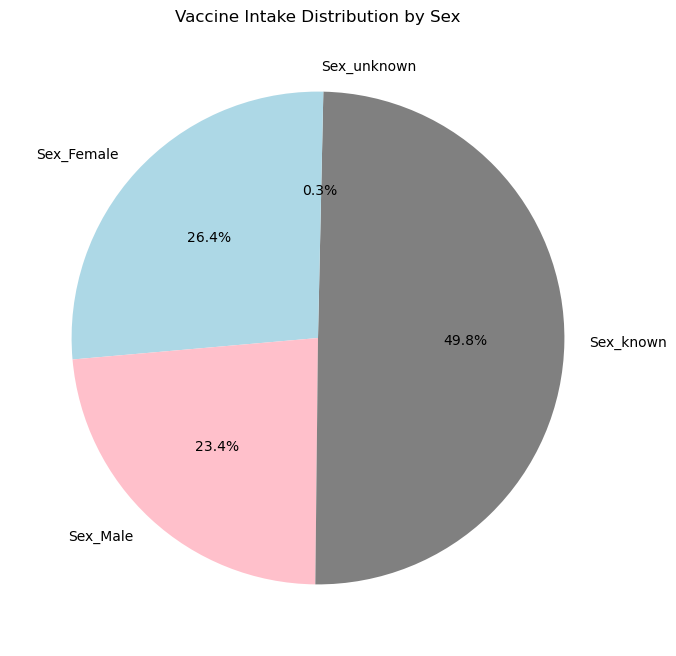

In [21]:
# Group by Sex and calculate total intake
sex_data = df_cleaned.groupby('Sex')['Total_Intake'].sum()

# Plot
plt.figure(figsize=(8, 8))
sex_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink', 'gray'])
plt.title('Vaccine Intake Distribution by Sex')
plt.ylabel('') 
plt.show()


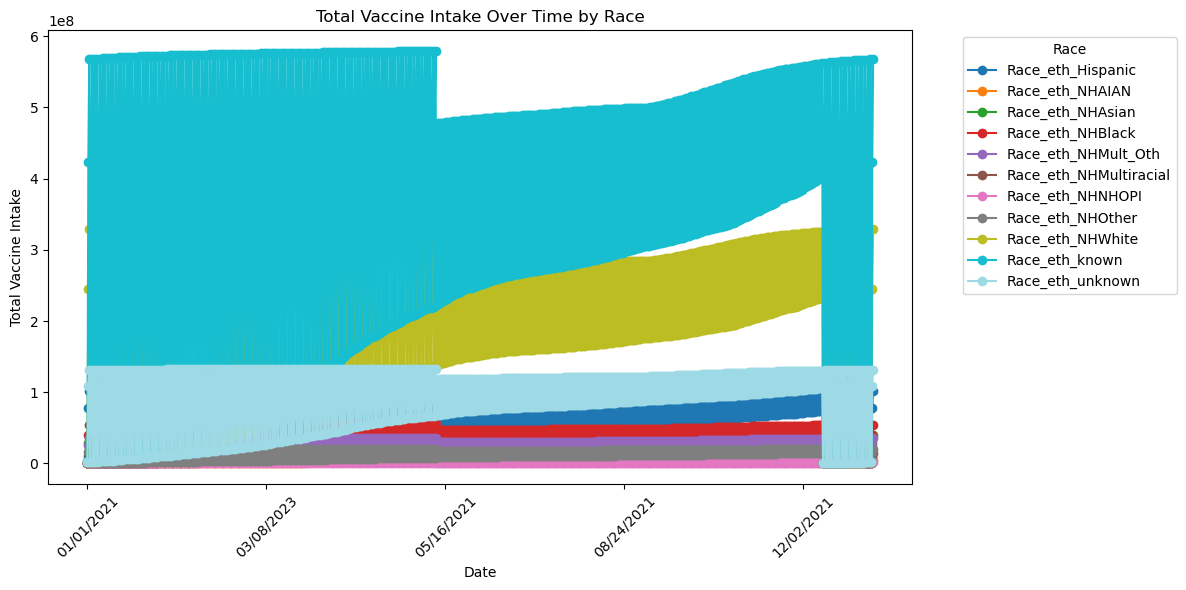

In [22]:
# Group by Date and Race to calculate Total Intake over time
date_race_data = df.groupby(['Date', 'Race'])['Total_Intake'].sum().unstack()

# Plot line plot for Race and Total Intake over time
date_race_data.plot(kind='line', figsize=(12, 6), marker='o', colormap='tab20')
plt.title('Total Vaccine Intake Over Time by Race')
plt.xlabel('Date')
plt.ylabel('Total Vaccine Intake')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


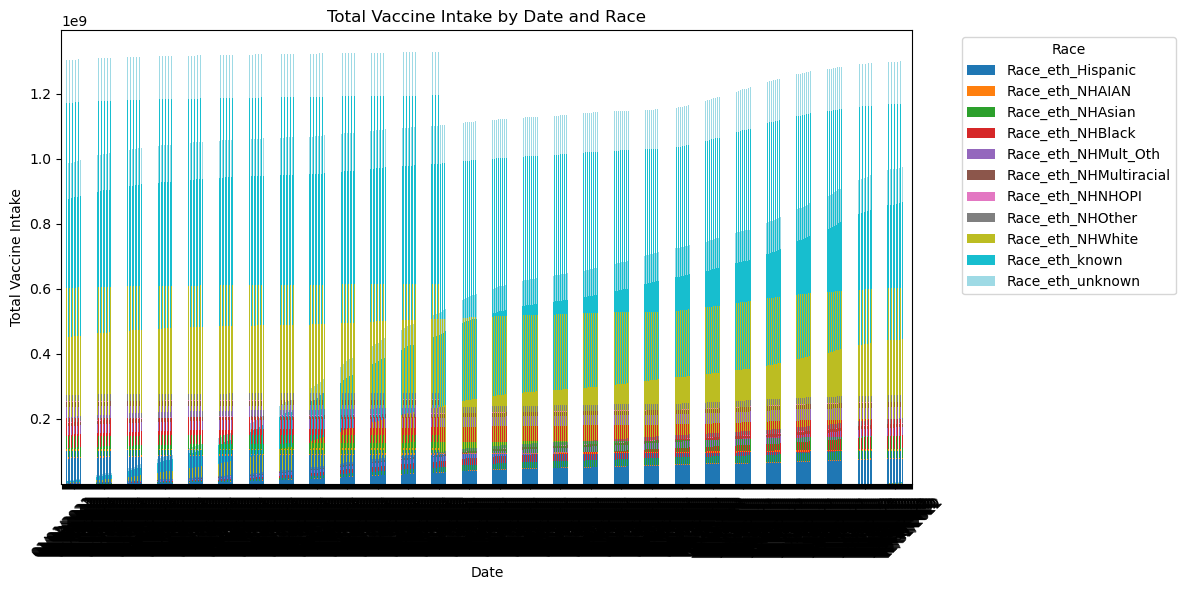

In [23]:
# Group by Date and Race for a bar plot
date_race_data = df.groupby(['Date', 'Race'])['Total_Intake'].sum().unstack()

# Plot bar plot for Race and Total Intake over time
date_race_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Total Vaccine Intake by Date and Race')
plt.xlabel('Date')
plt.ylabel('Total Vaccine Intake')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


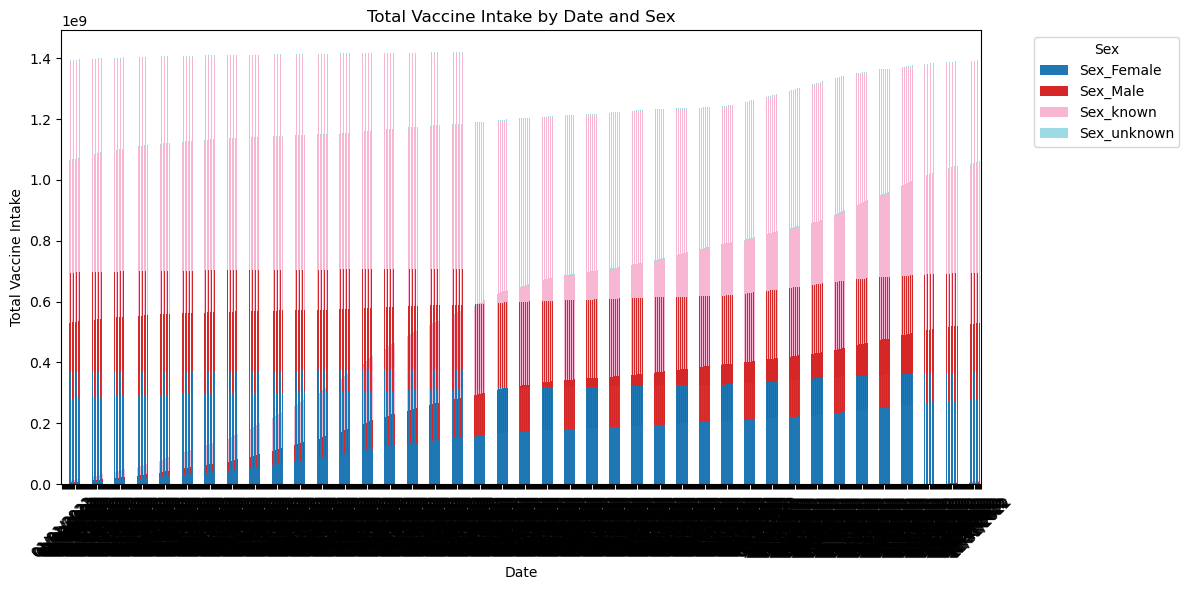

In [24]:
# Group by Date and Sex for stacked bar plot
date_sex_data = df.groupby(['Date', 'Sex'])['Total_Intake'].sum().unstack()

# Plot stacked bar plot for Sex and Total Intake over time
date_sex_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Total Vaccine Intake by Date and Sex')
plt.xlabel('Date')
plt.ylabel('Total Vaccine Intake')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


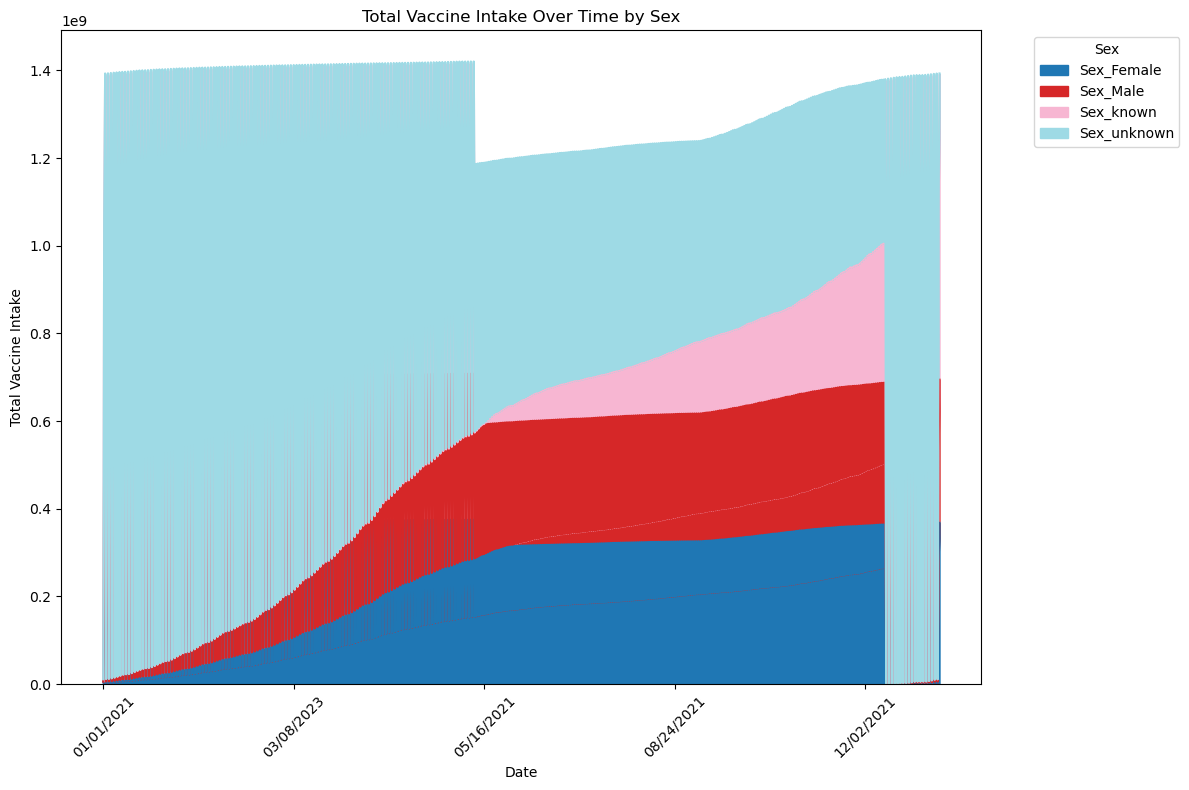

In [25]:
# Group by Date and Sex for the area plot
date_sex_data = df.groupby(['Date', 'Sex'])['Total_Intake'].sum().unstack()

# Plot area plot for Sex and Total Intake over time
date_sex_data.plot(kind='area', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Total Vaccine Intake Over Time by Sex')
plt.xlabel('Date')
plt.ylabel('Total Vaccine Intake')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


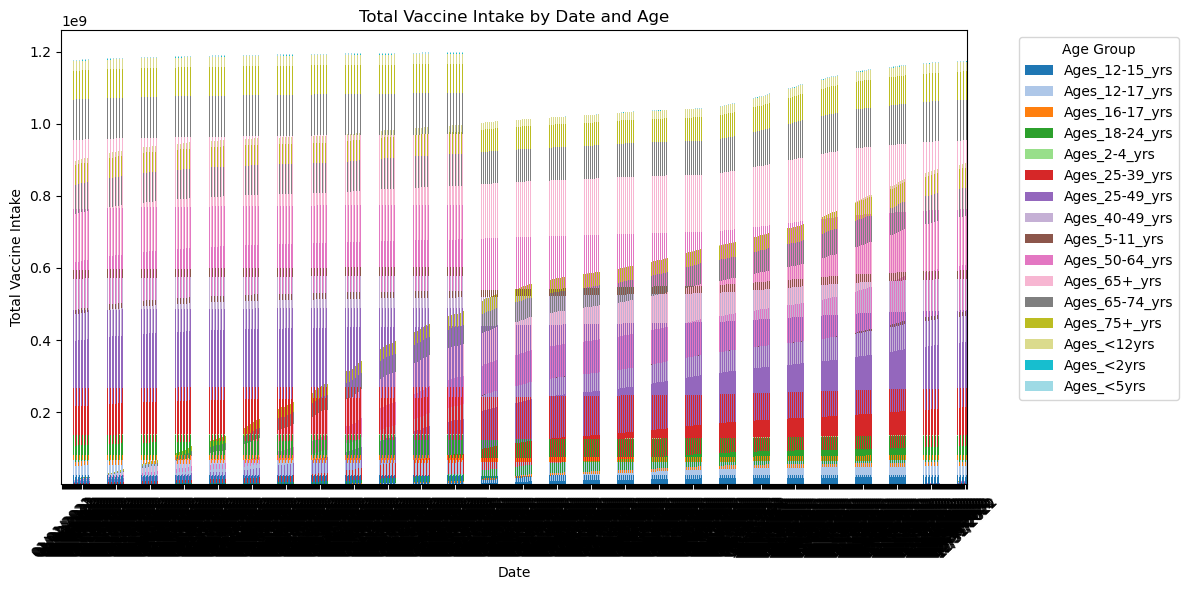

In [26]:
# Group by Date and Age for the stacked bar plot
date_age_data = df.groupby(['Date', 'Age'])['Total_Intake'].sum().unstack()

# Plot stacked bar plot for Age and Total Intake over time
date_age_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Total Vaccine Intake by Date and Age')
plt.xlabel('Date')
plt.ylabel('Total Vaccine Intake')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


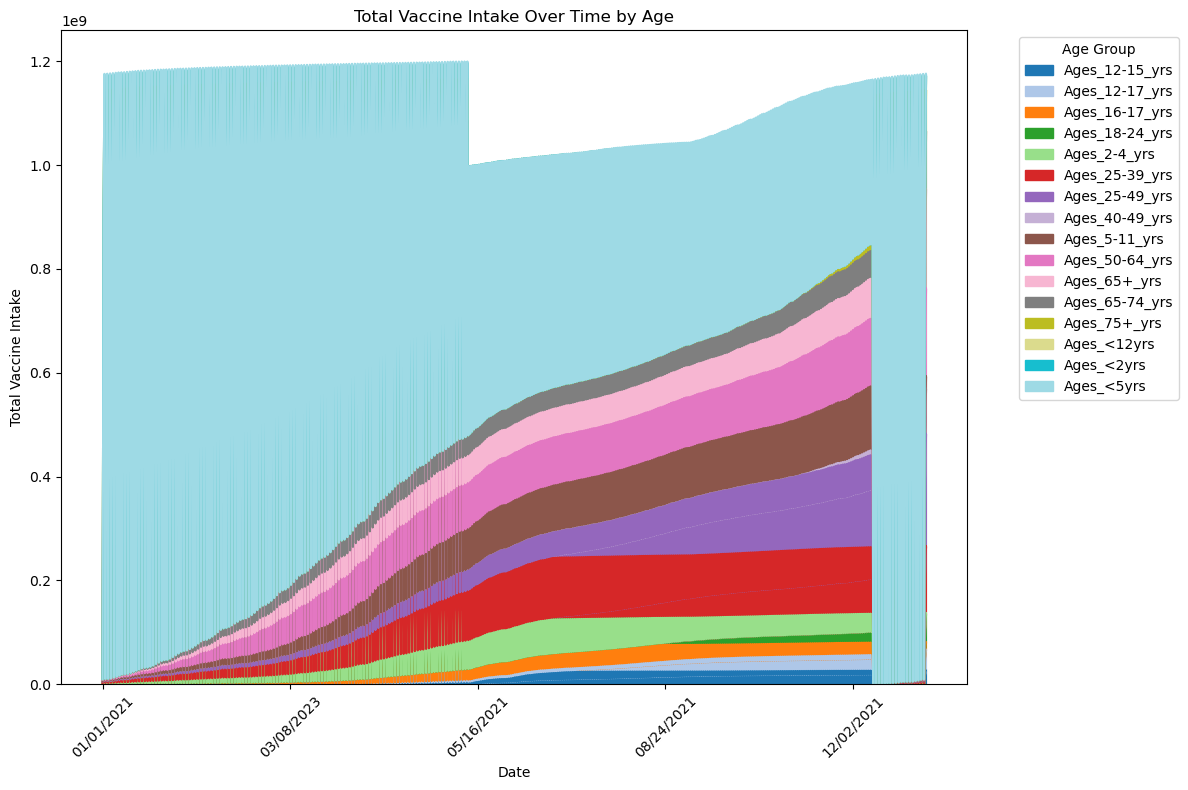

In [27]:
# Group by Date and Age for the area plot
date_age_data = df.groupby(['Date', 'Age'])['Total_Intake'].sum().unstack()

# Plot area plot for Age and Total Intake over time
date_age_data.plot(kind='area', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Total Vaccine Intake Over Time by Age')
plt.xlabel('Date')
plt.ylabel('Total Vaccine Intake')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


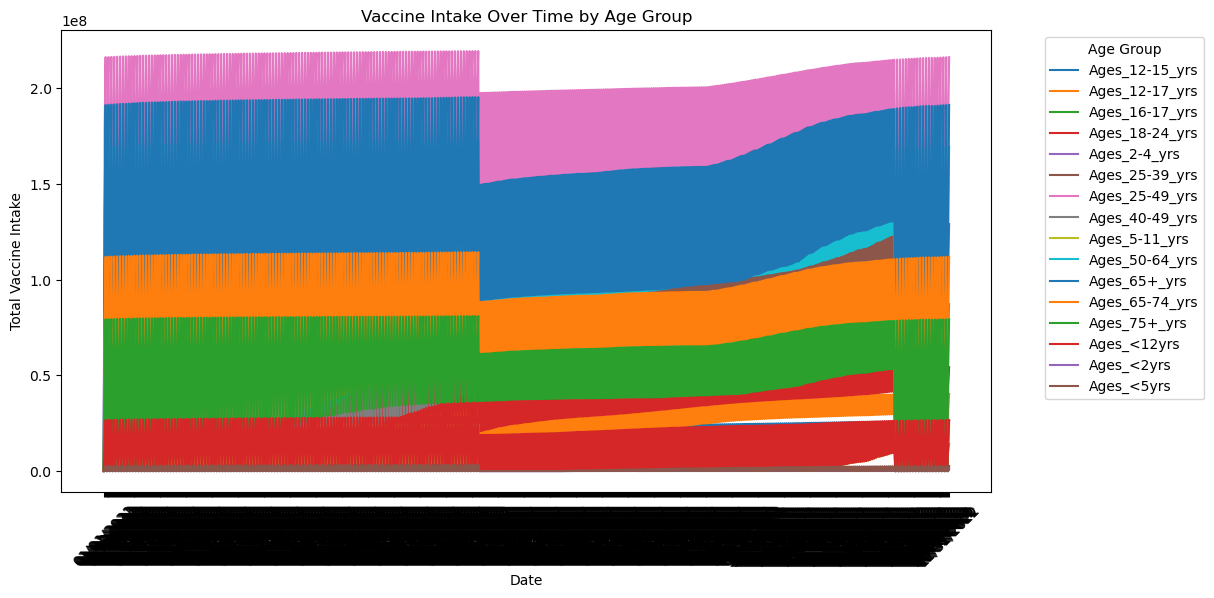

In [28]:
# Group by Date and Age, then calculate total intake
time_series_data = df_cleaned.groupby(['Date', 'Age'])['Total_Intake'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_data, x='Date', y='Total_Intake', hue='Age', palette='tab10')
plt.xticks(rotation=45)
plt.title('Vaccine Intake Over Time by Age Group')
plt.xlabel('Date')
plt.ylabel('Total Vaccine Intake')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


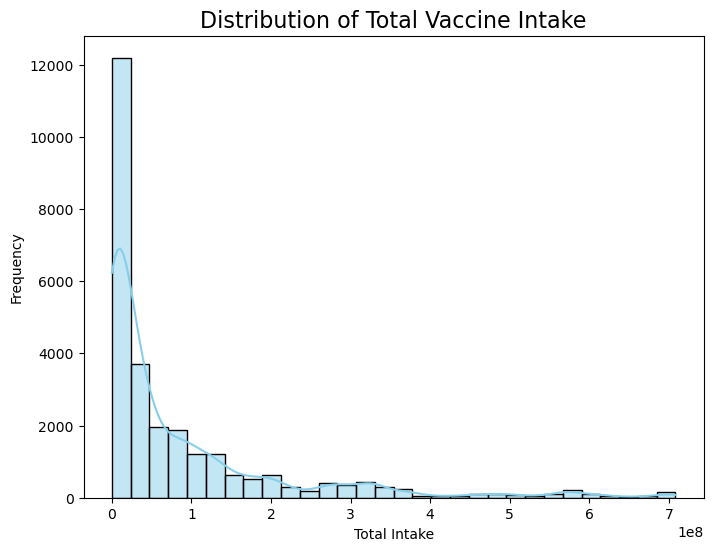

In [29]:
# Distribution plot for Total_Intake
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Total_Intake'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Vaccine Intake', fontsize=16)
plt.xlabel('Total Intake')
plt.ylabel('Frequency')
plt.show()


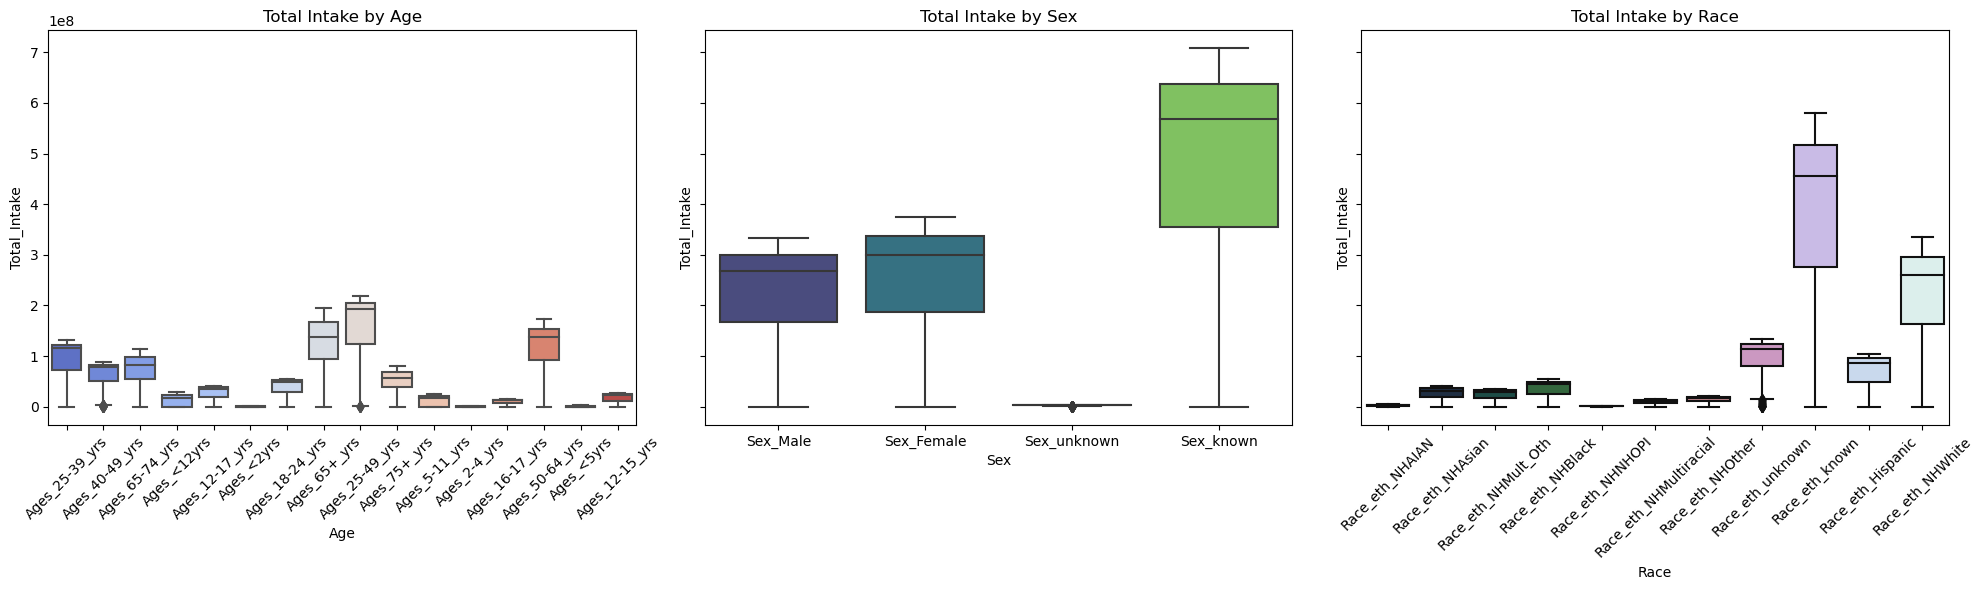

In [30]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plot by Age
sns.boxplot(data=df_cleaned, x='Age', y='Total_Intake', ax=axes[0], palette='coolwarm')
axes[0].set_title('Total Intake by Age')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot by Sex
sns.boxplot(data=df_cleaned, x='Sex', y='Total_Intake', ax=axes[1], palette='viridis')
axes[1].set_title('Total Intake by Sex')

# Plot by Race
sns.boxplot(data=df_cleaned, x='Race', y='Total_Intake', ax=axes[2], palette='cubehelix')
axes[2].set_title('Total Intake by Race')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


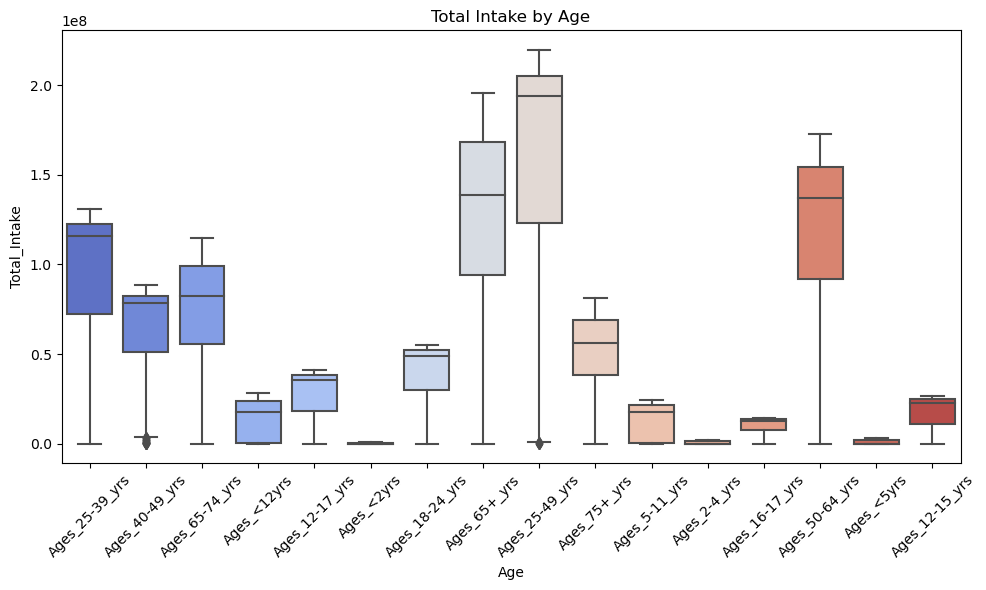

In [31]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Boxplot by Age
sns.boxplot(data=df, x='Age', y='Total_Intake', palette='coolwarm')
plt.title('Total Intake by Age')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



## Model Building

In [32]:
df

,Date,Demographic_category,Total_Intake,Age,Race,Sex
0,05/10/2023,Race_eth_NHAIAN,4882869.0,NaN,Race_eth_NHAIAN,NaN
1,05/10/2023,Age_unknown,11839.0,NaN,NaN,NaN
2,05/10/2023,Race_eth_NHAsian,41648559.0,NaN,Race_eth_NHAsian,NaN
3,05/10/2023,Race_eth_NHMult_Oth,36011095.0,NaN,Race_eth_NHMult_Oth,NaN
4,05/10/2023,Race_eth_NHBlack,55497563.0,NaN,Race_eth_NHBlack,NaN
...,...,...,...,...,...,...
29881,12/13/2020,Age_known,46480.0,NaN,NaN,NaN
29882,12/13/2020,Ages_18-24_yrs,2352.0,Ages_18-24_yrs,NaN,NaN
29883,12/13/2020,Ages_65+_yrs,13439.0,Ages_65+_yrs,NaN,NaN
29884,12/13/2020,Ages_40-49_yrs,7000.0,Ages_40-49_yrs,NaN,NaN


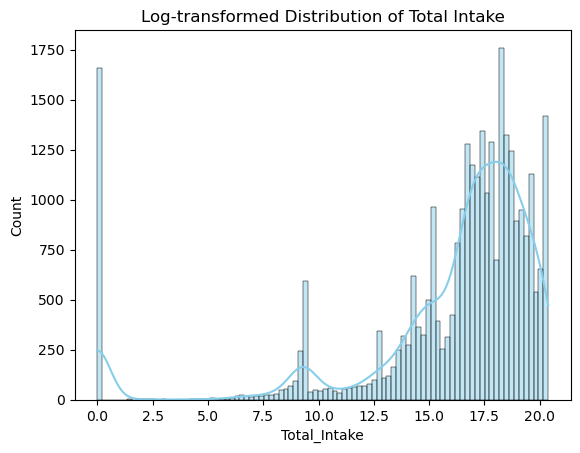

In [33]:
import numpy as np

# Apply log transformation to Total_Intake (with a small constant to handle zeros)
df['Total_Intake'] = np.log(df['Total_Intake'] + 1)

# Check if the transformation helps with distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Total_Intake'], kde=True, color='skyblue')
plt.title('Log-transformed Distribution of Total Intake')
plt.show()


## Modelling

Mean Absolute Error (MAE): 0.012316943575006628
Mean Squared Error (MSE): 0.008217822367142184
R-squared: 0.9996282638255002
Top 10 Influencing Features:
                         Feature  Importance
33                          Year    0.200371
15        Demographic_Ages_<2yrs    0.171544
5       Demographic_Ages_2-4_yrs    0.169605
16        Demographic_Ages_<5yrs    0.166253
0        Demographic_Age_unknown    0.088575
34                         Month    0.061255
23  Demographic_Race_eth_NHNHOPI    0.020212
9      Demographic_Ages_5-11_yrs    0.017294
14       Demographic_Ages_<12yrs    0.015305
18   Demographic_Race_eth_NHAIAN    0.011309


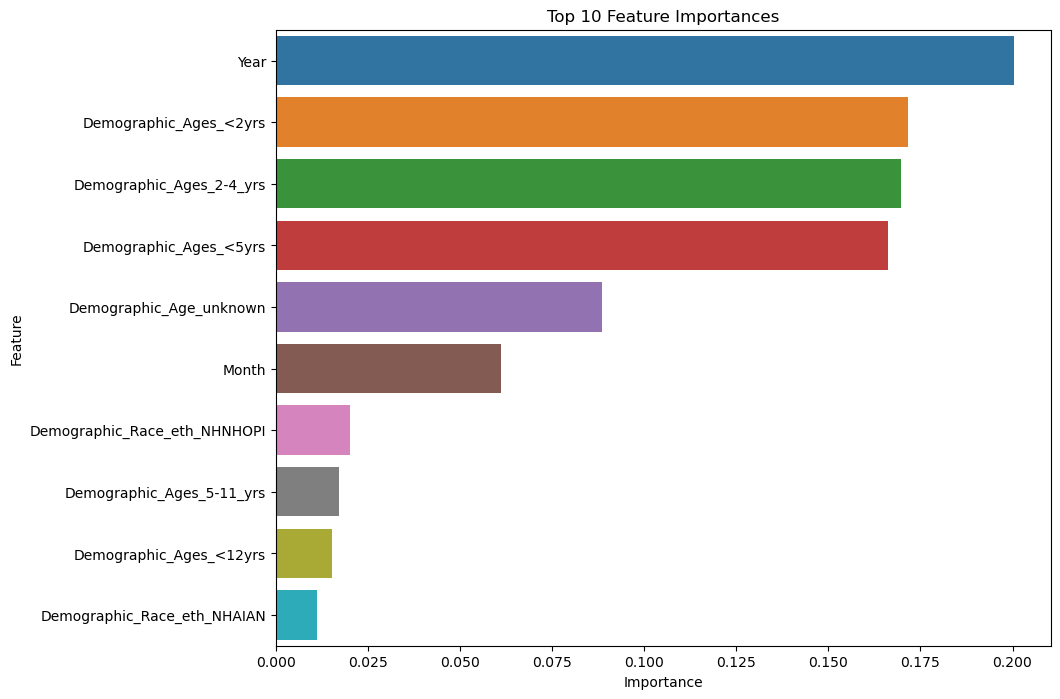

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess data
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# One-hot encode Demographic_category
df_encoded = pd.get_dummies(df['Demographic_category'], prefix='Demographic', drop_first=True)

# Combine encoded demographic features and date features
X = pd.concat([df_encoded, df[['Year', 'Month', 'Day']]], axis=1)
y = df['Total_Intake']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Extract feature importances and their corresponding names
importances = rf_model.feature_importances_
feature_names = X.columns

# Combine into a DataFrame for better presentation
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features with their absolute importance values
top_features = importance_df.head(10)
print("Top 10 Influencing Features:")
print(top_features)



# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
